# SVM

Neste ficheiro encontras-se o código relacionado com a implementação da árvore de decisão e os resultados dos seus testes

In [35]:
# Árvores de Decisão

Neste ficheiro encontrasse o código relacionado com a implementação da árvore de decisão e os resultados dos seus testesimport pandas as pd
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

covid_data = pd.read_csv('google_new3.csv',sep=";")


## Análise de Dados

Nesta secção do código realizamos um breve análise dos dados fornecidos.

In [36]:
str_column =['iso','country','residential']
target_column = ['total_cases','fatalities'] 
predictors = list(set(list(covid_data.columns))-set(target_column)-set(str_column))
covid_data[predictors] = covid_data[predictors]
print(covid_data.columns)
covid_data.describe().transpose()

Index(['iso', 'country', 'date', 'grocery_pharmacy', 'parks', 'residential',
       'retail_recreation', 'transit_stations', 'workplaces', 'total_cases',
       'fatalities'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
date,817.0,22.000000,12.417275,1.000,11.000,22.000,33.000,43.000
grocery_pharmacy,817.0,-8.229424,21.313369,-84.798,-16.578,0.088,4.838,59.474
parks,817.0,-13.394035,32.891636,-91.456,-32.841,-6.498,6.961,75.002
residential,817.0,9.545845,10.545377,-3.647,0.744,5.912,16.695,40.343
retail_recreation,817.0,-26.205257,30.992728,-95.158,-49.975,-14.427,-0.632,19.699
transit_stations,817.0,-28.370122,30.211025,-88.956,-54.145,-19.502,-0.970,16.822
workplaces,817.0,-19.126192,25.983021,-79.293,-40.582,-8.395,1.037,21.347
total_cases,817.0,10699.773562,31656.464952,0.000,27.000,648.000,4585.000,336912.000
fatalities,817.0,566.007344,2008.520488,0.000,0.000,6.000,79.000,15887.000


### Agrupamento de Dados

Agrupamos os dados dos vários países por continente

In [37]:
EU_covid_data = covid_data.loc[((covid_data['country'] == 'Germany') 
                               | (covid_data['country'] == 'Spain')
                               | (covid_data['country'] == 'France')
             ### Agrupamento de Dados

Agrupamos os dados dos vários países por continente                  | (covid_data['country'] == 'United Kingdom')
                               | (covid_data['country'] == 'Italy')
                               | (covid_data['country'] == 'Sweden'))]

AM_covid_data = covid_data.loc[((covid_data['country'] == 'Argentina')
                                | (covid_data['country'] == 'Canada')
                                | (covid_data['country'] == 'Mexico')
                                | (covid_data['country'] == 'US')
                                | (covid_data['country'] == 'Brazil'))]

AS_OC_covid_data = covid_data.loc[((covid_data['country'] == 'Indonesia')
                               | (covid_data['country'] == 'India')
                               | (covid_data['country'] == 'Japan')
                               | (covid_data['country'] == 'South Korea')
                               | (covid_data['country'] == 'Australia'))]

AF_covid_data = covid_data.loc[((covid_data['country'] == 'South Africa') 
                                | (covid_data['country'] == 'Saudi Arabia')
                                | (covid_data['country'] == 'Turkey'))]

## Criação do Modelo

Nesta secção treinamos a nossa SVM.

### Divisão dos dados

Dividimos os dados fornecidos para os testes e para o treino

In [38]:
X=EU_covid_data[predictors]
Y1=EU_covid_data["total_cases"]
Y2=EU_covid_data["fatalities"]


X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.30, random_state=40)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.30, random_state=40)

### Treino do modelo 

Nesta secção treinamos o modelo com os dados para treino.

In [39]:
from sklearn.svm import SVR### Treino do modelo 

Nesta secção treinamos o modelo com os dados para treino.
SVRegression=SVR(kernel = 'poly',degree=11, coef0=2)
SVRegression.fit(X_train,y1_train)

SVR(C=1.0, cache_size=200, coef0=2, degree=11, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred=SVRegression.predict(X_test)
y_pred2=SVRegression.predict(X_train)

### Score do treino

In [41]:
print(mean_squared_error(y1_test,y_pred))
print(r2_score(y1_test,y_pred))

84191930.3914556
0.9275744101024674


In [42]:
print(mean_squared_error(y1_train,y_pred2))
print(r2_score(y1_train,y_pred2))

34363210.973284945
0.9664833743463441


In [43]:
SVRegression.fit(X2_train,y2_train)

SVR(C=1.0, cache_size=200, coef0=2, degree=11, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred=SVRegression.predict(X2_test)
y_pred2=SVRegression.predict(X2_train)

In [45]:
print(mean_squared_error(y2_test,y_pred))
print(r2_score(y2_test,y_pred))

609610.7854715444
0.9493613851424302


In [46]:
print(mean_squared_error(y2_train,y_pred2))
print(r2_score(y2_train,y_pred2))

19479.851960910433
0.9979255445913073


### Representação gráfica

Nesta secção representamos os valores previstos da SVM para os vários valores de variação das localidades.

In [47]:
test2_regr = ['date']

SVRegression1=SVR(kernel = 'poly',degree=11, coef0=2)
SVRegression1.fit(EU_covid_data[test2_regr],EU_covid_data["total_cases"])

SVRegression2=SVR(kernel = 'poly',degree=11, coef0=2)
SVRegression2.fit(EU_covid_data[test2_regr],EU_covid_data["fatalities"])

SVR(C=1.0, cache_size=200, coef0=2, degree=11, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

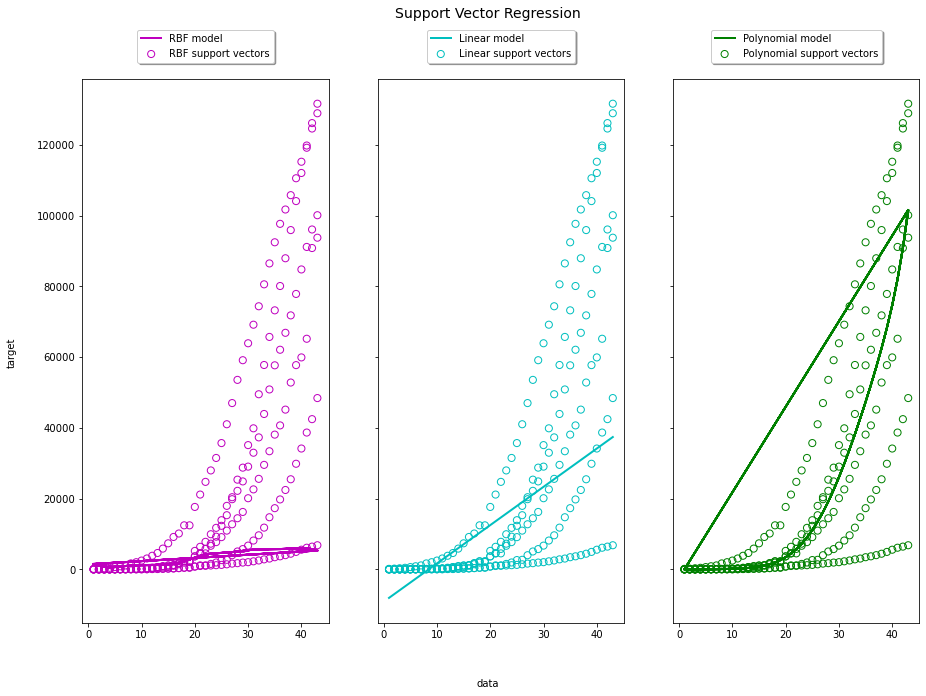

In [52]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_rbf =SVR(kernel = 'rbf',C=100, gamma=0.1, epsilon=.1)
svr_lin =SVR(kernel = 'linear',C=100, gamma='auto')
svr_poly =SVR(kernel = 'poly',degree=11, coef0=2)

test2_regr = ['date']
X=EU_covid_data[test2_regr].values
y=EU_covid_data['total_cases'].values



lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50)
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()